This notebook is for illustrating how these unsupervised learning methods work and their performance on finding relationships in the data without the help of labels.

Data: Handwritten zip code images

In [1]:
import pandas as pd
import numpy as np
import itertools
import sklearn
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.covariance import EllipticEnvelope

Data Reading and filtering. We just want to focus on seperating 3's, 6's and 9's from each other.

In [2]:
path = "E:/taniesta/Columbia University/digital center intership/unsupervised learning/"
df = pd.read_table(path + 'zip.txt', header=None, sep= " ")
df = df[(df[0] == 3) | (df[0] == 6) | (df[0] == 9)]
df[0].value_counts()

9    177
6    170
3    166
Name: 0, dtype: int64

The data are arrays converted from image. Each column is a pixel from a 16$\times$16 image. Labels of digits are in the 0th column.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


Convert arrays back to images

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


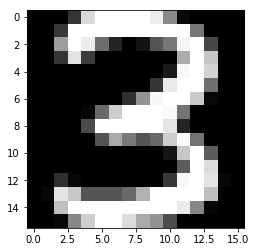

In [4]:
X = df.iloc[:,1:]
plt.imshow(X.iloc[2,:].reshape([16,16]), cmap="gray")
plt.show()
label = [str(l) for l in list(df.iloc[:,0])]

# PCA

Fit a pca model and transform the data into principal components.

In [5]:
pca = PCA()
pc = pca.fit_transform(X)

#Equivalently:
#pca.fit(X)
#pca.transform(X)

Plot first two principal components.

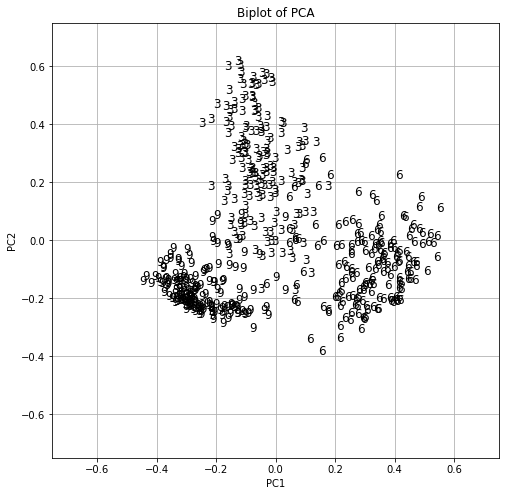

In [6]:
n = X.shape[0]
def myplot(pc,labels, xlim = [-.75,.75], ylim = [-.75, .75]):
    plt.figure(figsize=(8,8))
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title("Biplot of PCA")
    plt.grid()
    xs = pc[:,0]
    ys = pc[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for i in range(n):
        plt.text(xs[i] * scalex,ys[i] * scaley,labels[i],
                 ha = 'center', va = 'center',fontsize = 12)
    plt.show()

#Call the function. Use only the 2 PCs.
myplot(pc,labels = label)

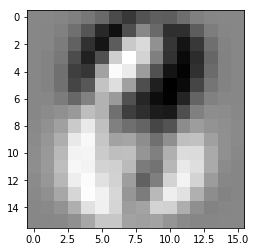

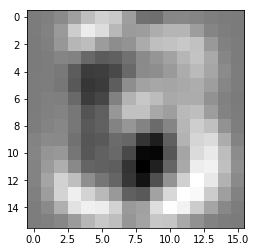

In [7]:
plt.imshow(pca.components_[0,:].reshape([16,16]), cmap="gray")
plt.show()
plt.imshow(pca.components_[1,:].reshape([16,16]), cmap="gray")
plt.show()

# Kernel PCA

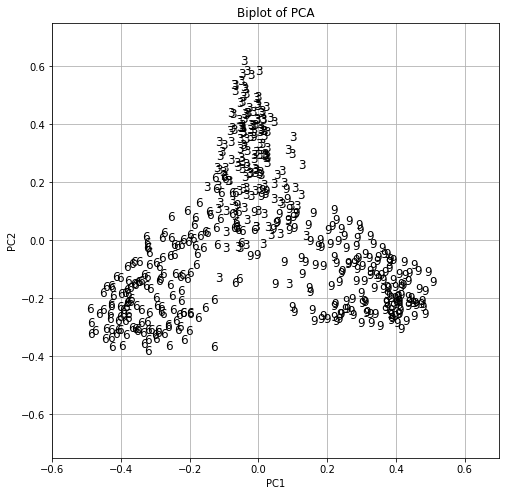

In [8]:
kpca = KernelPCA(kernel = "rbf", gamma = .008)
kpc = kpca.fit_transform(X)
myplot(kpc,labels = label, xlim = [-.6,.7], ylim = [-.75,.75])

# K-means

The numer of clusters has to be given first.

In [9]:
km_pc = KMeans(3, max_iter=1000, random_state=2019, n_jobs=2)
km_pc.fit(pc[:,0:10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=2019, tol=0.0001, verbose=0)

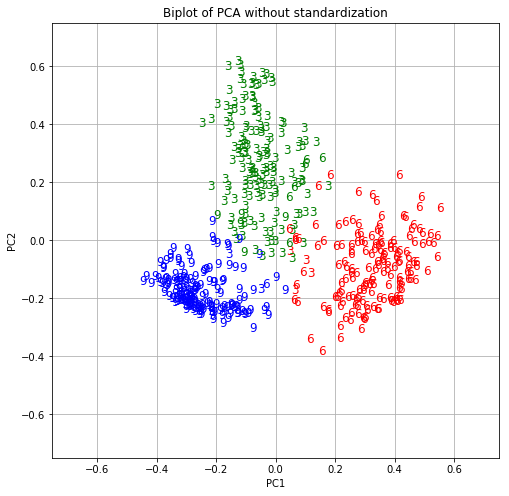

In [10]:
def cluster_plot(pc,labels,cluster, xlim = [-.75,.75], ylim = [-.75, .75]):
    plt.figure(figsize=(8,8))
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title("Biplot of PCA without standardization")
    plt.grid()
    xs = pc[:,0]
    ys = pc[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for i in range(n):
        plt.text(xs[i] * scalex,ys[i] * scaley,labels[i],
                 ha = 'center', va = 'center',fontsize = 12,color = ["r","g","b"][cluster[i]])
    plt.show()

#Call the function. Use only the 2 PCs.
cluster_plot(pc,labels = label, cluster = km_pc.labels_)

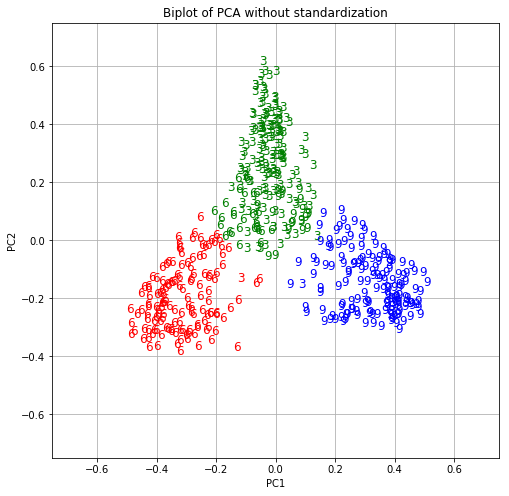

In [11]:
km_kpc = KMeans(3, max_iter=1000, random_state=2019, n_jobs=2)
km_kpc.fit(kpc[:,0:10])
cluster_plot(kpc,labels = label, cluster = km_kpc.labels_)

# Agglomerative Clustering
## Ward critetrion

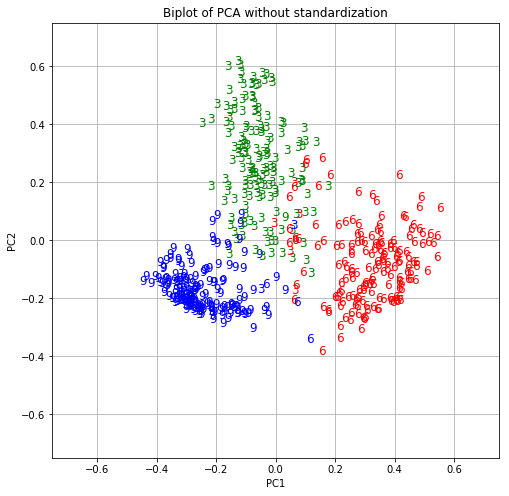

In [12]:
ward_pc = AgglomerativeClustering(3, linkage="ward")
ward_pc.fit(pc[:,0:10])
cluster_plot(pc,labels = label, cluster = ward_pc.labels_)

# Agglomerative Clustering
## Average critetrion

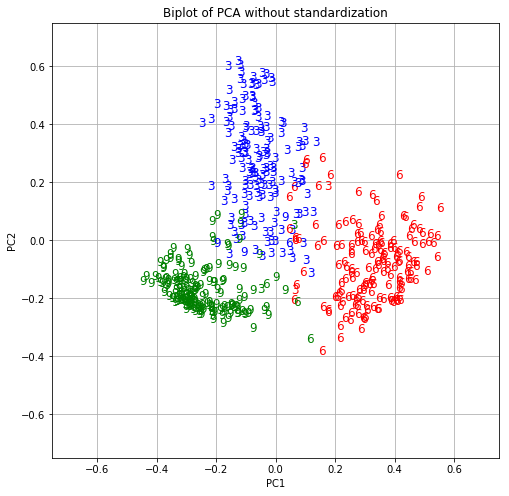

In [13]:
avg_pc = AgglomerativeClustering(3,linkage = "average")
avg_pc.fit(pc[:,0:4])
cluster_plot(pc,labels = label, cluster = avg_pc.labels_)

# Outlier Detection
## Elliptic Envelope

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


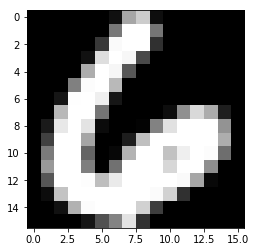

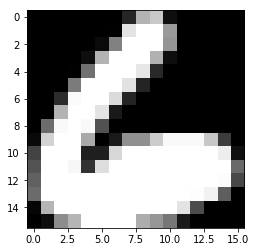

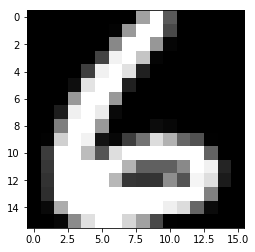

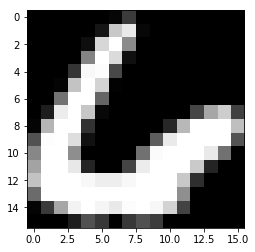

In [14]:
ell = EllipticEnvelope(contamination=.007)
out_pred = ell.fit_predict(pc[:,:3])
outlier = np.where(out_pred==-1)
for i in outlier[0]:
    plt.imshow(X.iloc[i,:].reshape([16,16]), cmap="gray")
    plt.show()